<a href="https://colab.research.google.com/github/istvanbaksa/Data-Science-1/blob/main/Hands_On_Data_Analysis_with_Pandas_%E2%80%93_Second_Edition_Chapter_5_Exercises_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Hands-On Data Analysis with Pandas – Second Edition Chapter 5 Exercises 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


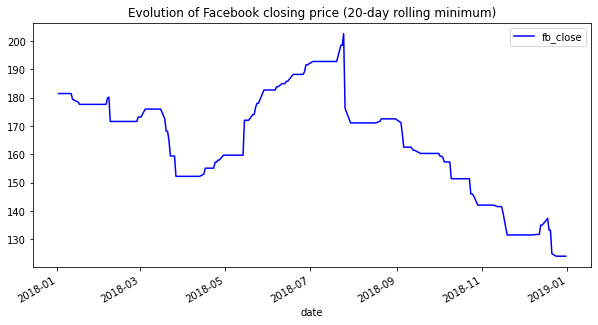

time: 8.17 s (started: 2022-08-04 21:00:06 +00:00)


In [ ]:
'''
Create the following visualizations using what you have learned up to this point in this
book. Use the data from this chapter's data/ directory:
1. Plot the rolling 20-day minimum of the Facebook closing price using pandas.
'''
!pip install ipython-autotime
%load_ext autotime

import pandas as pd
import numpy as np
import matplotlib as plt

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

fb = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_05/data/fb_stock_prices_2018.csv')
fb.date = pd.to_datetime(fb.date)
fb = fb.set_index('date')
fb['fb_close'] = fb['close'].rolling('20D', min_periods = 1).min()

fb.plot(kind = 'line', y = 'fb_close', figsize = (10, 5), style = '-b', legend = True, title = 
        'Evolution of Facebook closing price (20-day rolling minimum)')

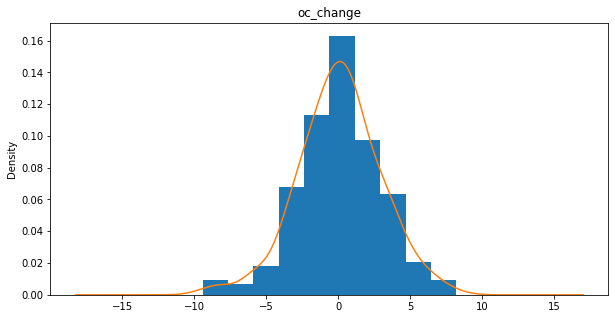

time: 994 ms (started: 2022-08-04 21:00:19 +00:00)


In [ ]:
'''
2. Create a histogram and KDE of the change from open to close in the price of
Facebook stock.
'''
import pandas as pd
import numpy as np
import matplotlib as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

fb = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_05/data/fb_stock_prices_2018.csv')
fb.date = pd.to_datetime(fb.date)
fb = fb.set_index('date')

fb['oc_change'] = fb.close - fb.open

fb.hist(column = 'oc_change', figsize = (10, 5), density = True)
display(fb.oc_change.plot(kind = 'kde'))

magType
mb       AxesSubplot(0.125,0.125;0.775x0.755)
ms_20    AxesSubplot(0.125,0.125;0.775x0.755)
mwr      AxesSubplot(0.125,0.125;0.775x0.755)
mww      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

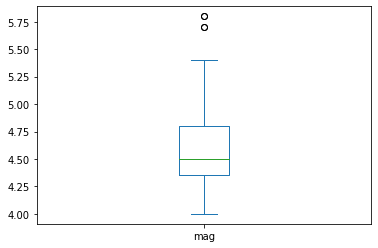

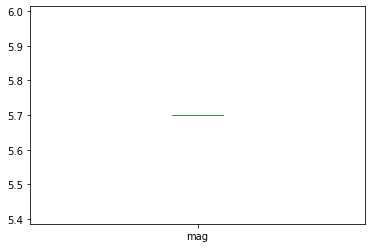

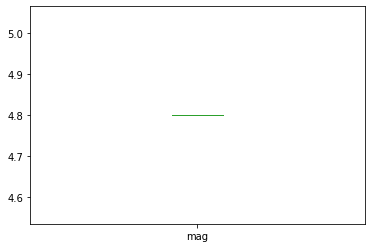

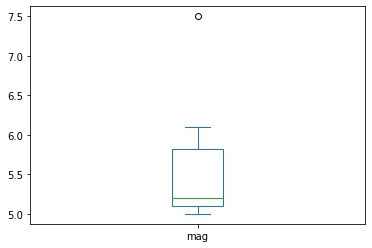

time: 588 ms (started: 2022-08-04 21:00:46 +00:00)


In [ ]:
'''
3. Using the earthquake data, create box plots for the magnitudes of each magType
used in Indonesia.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_02/data/earthquakes.csv')

df_ind = df[df.place.str.contains('Indonesia')]
df_ind = df_ind[['magType', 'mag']]
df_ind = df_ind.reset_index(drop = True)
df_ind.groupby('magType').plot(kind = 'box')

In [ ]:
'''
4. Make a line plot of the difference between the weekly maximum high price and the
weekly minimum low price for Facebook. This should be a single line.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', 100)

fb = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_05/data/fb_stock_prices_2018.csv')
fb.date = pd.to_datetime(fb.date)
fb = fb.reset_index(drop = True).set_index('date')

fb1 = fb[['high', 'low']]
fb1 = fb1.resample('1W').agg({'high': np.max, 'low':np.min})
fb1['diff'] = fb1['high'] - fb1['low']
fb1['diff'].plot.line()

In [ ]:
'''
5. Plot the 14-day moving average of the daily change in new COVID-19 cases in
Brazil, China, India, Italy, Spain, and the USA:
a) First, use the diff() method that was introduced in the Working with time
series data section of Chapter 4, Aggregating Pandas DataFrames, to calculate the
day-over-day change in new cases. Then, use rolling() to calculate the 14-day
moving average.
b) Make three subplots: one for China; one for Spain and Italy; and one for Brazil,
India, and the USA.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

cov = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_05/data/covid19_cases.csv')
cov['date'] = pd.to_datetime(cov['dateRep'])
cov = cov.reset_index(drop = True)
cov = cov.drop(['dateRep'], axis = 1)
cov = cov.set_index('date')
cov = cov.replace(to_replace = 'United_States_of_America', value = 'USA')
countries = ['Brazil', 'China', 'India', 'Italy', 'Spain', 'USA']
cov1 = cov[cov.countriesAndTerritories.isin(countries)][['cases', 'countriesAndTerritories']]
cov2 = cov1.pivot_table(index = 'date', columns = 'countriesAndTerritories', values = 'cases')
cov2 = cov2.diff()

cov2[countries] = cov2[countries].rolling('14D', min_periods = 1).agg(np.mean)
cov2 = cov2.fillna(0)

plot1 = cov2.China.plot(legend = True, figsize = (20,10))
plot2 = cov2[['Spain', 'Italy']].plot(legend = True, figsize = (20,10))
plot3 = cov2[['Brazil', 'India', 'USA']].plot(legend = True, figsize = (20,10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


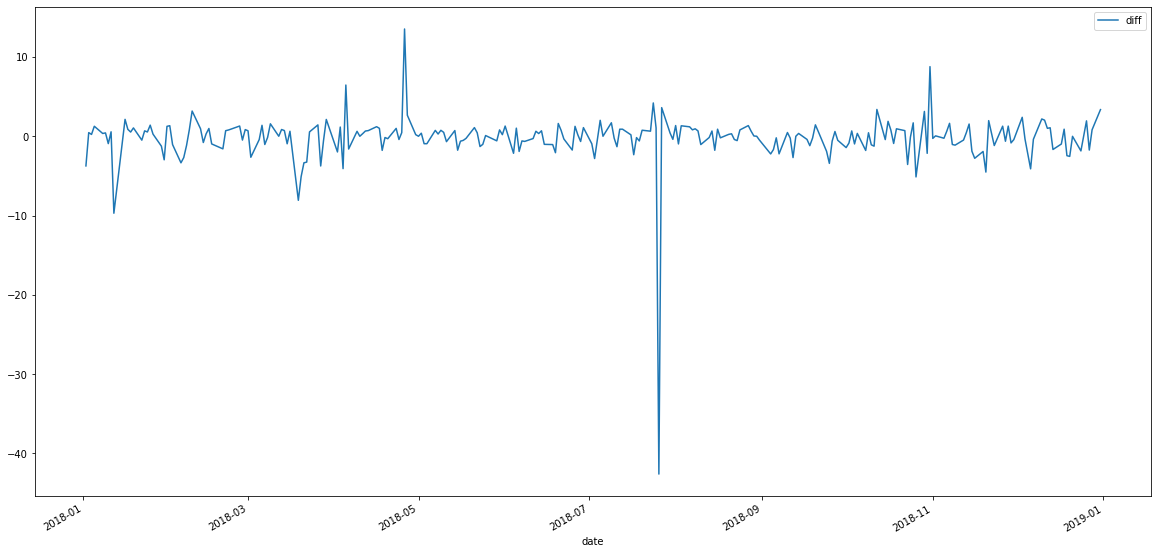

time: 375 ms (started: 2022-08-04 23:46:34 +00:00)


In [ ]:
'''
6. Using matplotlib and pandas, create two subplots side-by-side showing the
effect that after-hours trading has had on Facebook's stock prices:
a) The first subplot will contain a line plot of the daily difference between that day's
opening price and the prior day's closing price (be sure to review the Working
with time series data section of Chapter 4, Aggregating Pandas DataFrames, for an
easy way to do this).
b) The second subplot will be a bar plot showing the net effect this had monthly,
using resample().
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

fb = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_05/data/fb_stock_prices_2018.csv')

fb.date = pd.to_datetime(fb.date)
fb = fb.reset_index(drop = True)
fb = fb.set_index('date')

fb['close_new'] = fb.close
fb.close_new[1:-1] = fb.close_new[0:-2]
fb['diff'] = fb.open - fb.close_new

plot1 = fb['diff'].plot.line(legend = True, figsize = (20,10))

fb['monthly'] = fb['diff']

month = fb['monthly'].resample('1M').sum()